---
# PfDA Project 2
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import json
import csv
# Other libraries if needed
# import statsmodels
# import datetime
# import requests


---
# **Introduction**
---

This project aims to delve into a comprehensive examination of climate data across an extensive timeline, ranging from 800,000 years ago to the present day. The analysis primarily focuses on establishing correlations between CO2 levels and temperature anomalies while also exploring changes in polar ice coverage as a key variable. This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

## Project Overview
This project involves an intricate series of steps, encompassing data collection from reputable sources, integration of diverse datasets into a coherent framework, exploratory data analysis to uncover trends and relationships, and predictive modeling techniques to forecast future global temperature anomalies. Additionally, the study entails the comparison of these predictions with established climate models, intending to shed light on potential accelerated warming trends observed in recent climate features.

## Objectives and Goals
The primary objective of this research is to perform an in-depth analysis of climate data, investigating the relationship between CO2 levels and temperature anomalies while exploring related variables. The specific goals include the examination of Irish climate change signals, prediction of future global temperature anomalies, and the comparison of these predictions with established climate models.

## Scope and Limitations
The scope of this study encompasses the analysis of climate data spanning an extensive timeframe, incorporating various datasets to establish correlations and predict future temperature anomalies. However, certain limitations exist, including the potential constraints in data availability or accuracy, complexities in predictive modeling, and the inherent uncertainties associated with long-term climate predictions.

---
# Extraction
---

## Temperature

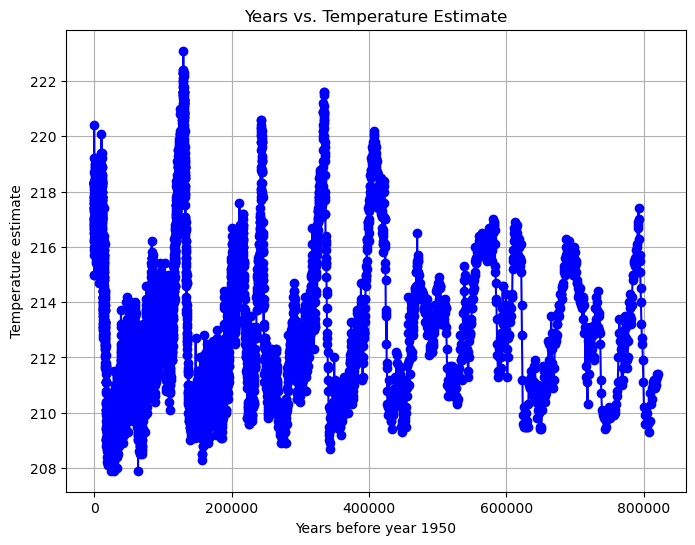

In [2]:
file_path1 = './data/temp/epicaDC.deuttemp.EDC3-AICC.csv'
df1 = pd.read_csv(file_path1)

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = df1['EDC3béta']
temperature_estimate = df1['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

## CO2

In [3]:
# Read the text file with tab-separated values
#df = pd.read_csv('./data/co2/grl52461-sup-0003-supplementary.txt', delimiter='\t', skiprows=28)

# Save the DataFrame to a CSV file
#df.to_csv('./data/co2/converted_co2_data.csv', index=False)

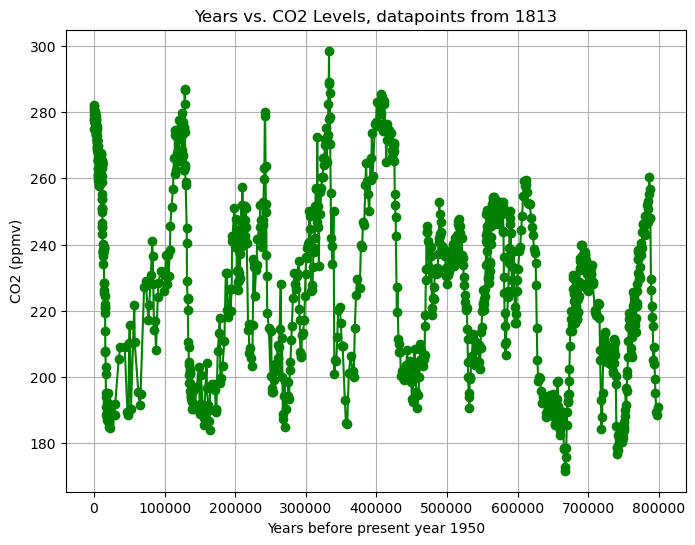

In [4]:
file_path2 = './data/co2/41586_2008_BFnature06949_MOESM31_ESM.xlsx'
df2 = pd.read_excel(file_path2, skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
df2.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = df2['EDC3_gas_a (yr)']
co2 = df2['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

The above data has the first data point in years as being 137 years Before Present(BP), with BP being 1950. In the below data, the year values in the first column commence at -51 years BP, which would put the year as 2001.

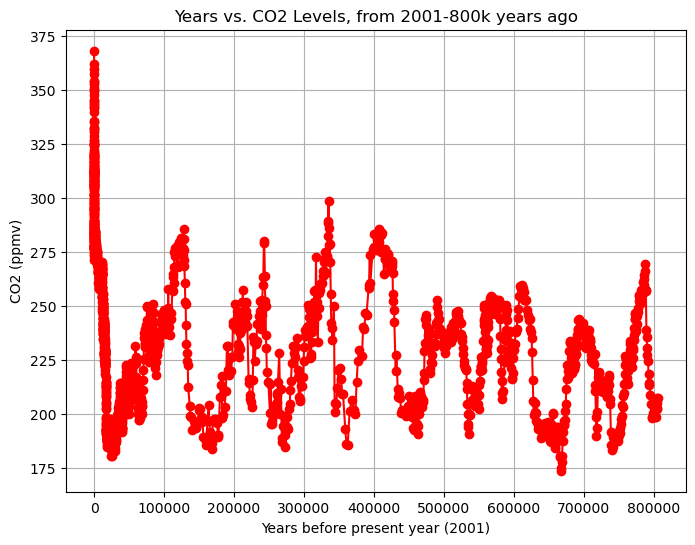

In [5]:
file_path3 = './data/co2/grl52461-sup-0003-supplementary.xlsx'
df3 = pd.read_excel(file_path3, skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
df3.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = df3['Gasage (yr BP) ']
co22 = df3['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year (2001)')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

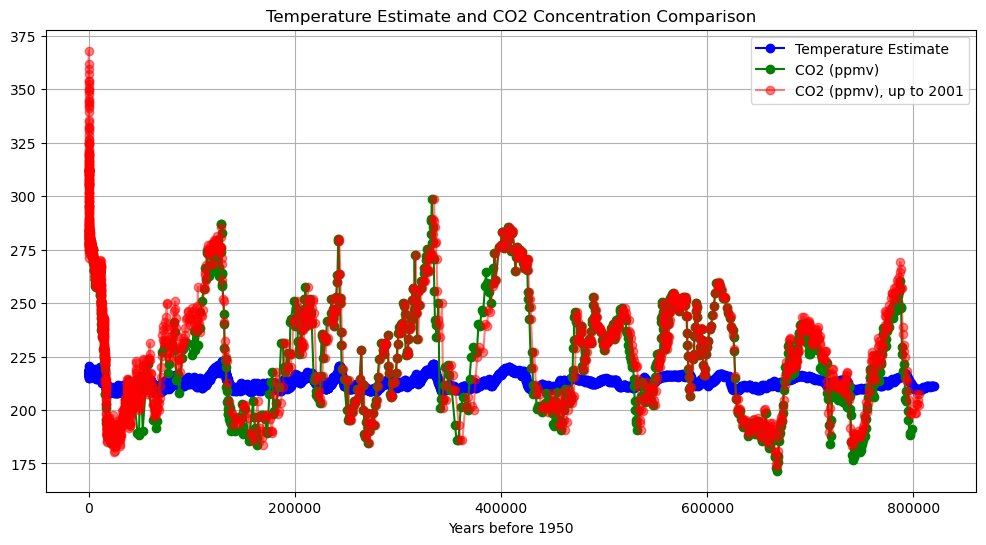

In [6]:
# Plotting both sets of data on the same graph
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

## Ice

The simulated ice data was gathered from the [NOAA](https://www.ncei.noaa.gov/access/paleo-search/) website.
A search entered as below will yield the original data set.
> Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions
https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/deboer2014/deboer2014.txt

In [7]:
# Read the text file with tab-separated values and replace -999 with NaN
file_path_txt = './data/ice/deboer2014.txt'
df = pd.read_csv(file_path_txt, delimiter='\t', na_values=-999, skiprows=114)

# Save the DataFrame to a CSV file
file_path_csv = './data/ice/generated/converted_icedata.csv'
df.to_csv(file_path_csv, index=False)

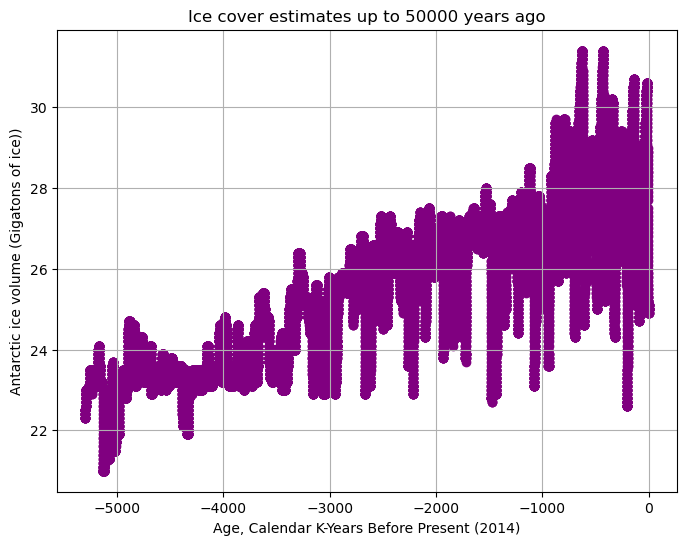

In [8]:
# Read the CSV file into a Pandas DataFrame
df_ice = pd.read_csv('./data/ice/generated/converted_icedata.csv')

# Extract data from the first column and 'AnIS-V' column
year = df_ice['age_calkaBP']
ice_volume = df_ice['AnIS-V']
temp_anom = df_ice['tempanomNH']
# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.scatter(year, ice_volume, color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()


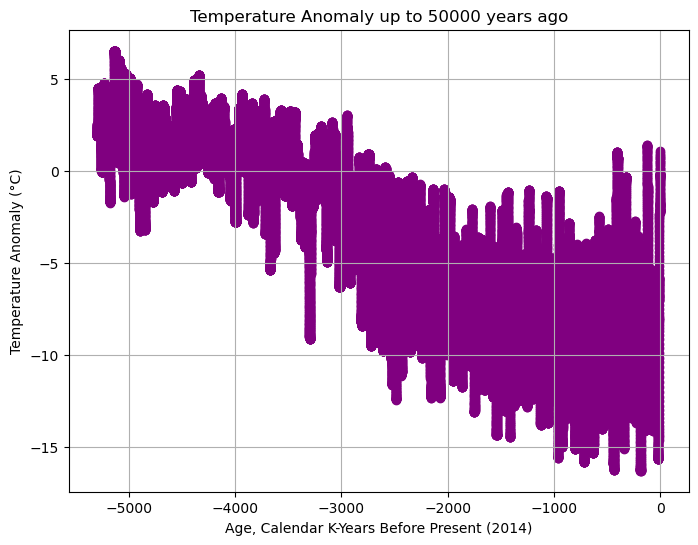

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(year, temp_anom, color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Temperature Anomaly (°C)')  
plt.title('Temperature Anomaly up to 50000 years ago')
plt.grid(True)
plt.show()

## Ireland

Irish rainfall data from 1711 - 2016 gathered from MET [Éireann](https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP), understanding gathered from this journal [article](https://cp.copernicus.org/articles/14/413/2018/) from Maynooth University.

This data shows the median monthly rainfall data for each month from the year 1711 - 2016. The data is a composite of many different data points taken from different weather stations throughout the given time period.

In [10]:
rain = pd.read_csv('./data/ireland/IOI_1711_SERIES.CSV')

print(rain.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


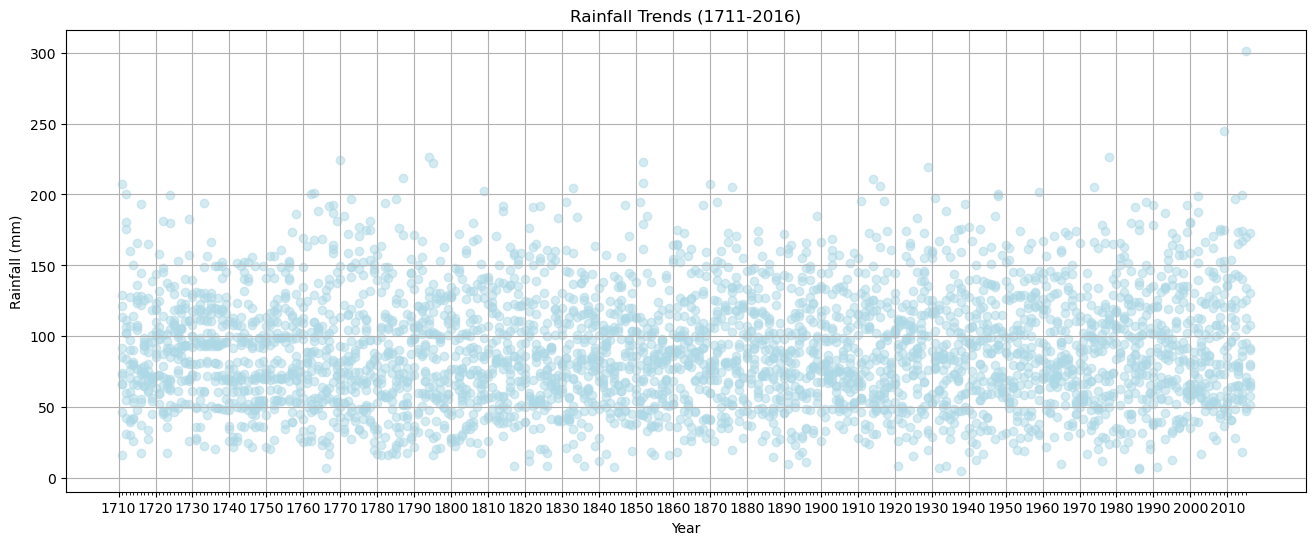

In [11]:
# Create a figure and axis
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(rain['Year'], rain['Median montly series'], color='lightblue', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

# EDA

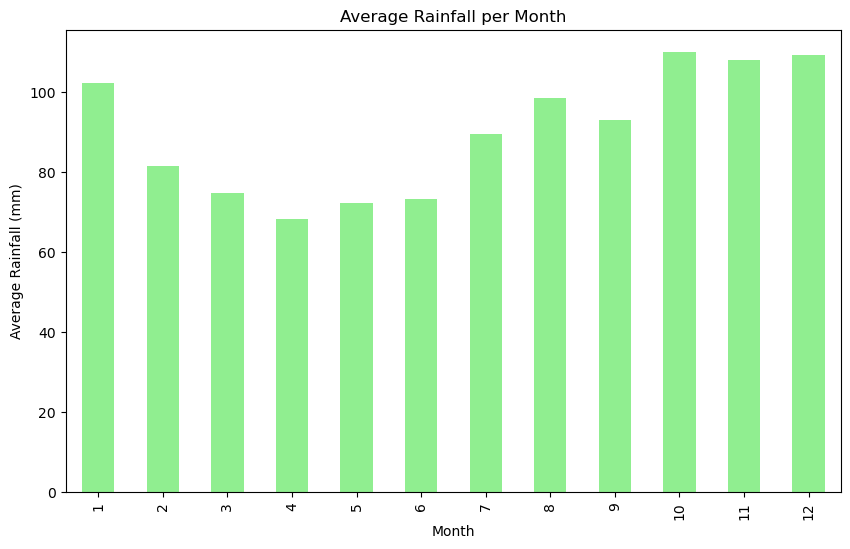

In [12]:
# Aggregating rainfall for each month
monthly_rainfall = rain.groupby('Month')['Median montly series'].mean()

# Plotting a bar plot for monthly rainfall
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

In [13]:
# # Calculate yearly median rainfall values
yearly_rainfall = rain.groupby('Year')['Median montly series'].median().reset_index()

# # Display the first and last rows of the yearly rainfall data
print(yearly_rainfall.head())

print(yearly_rainfall.tail())

   Year  Median montly series
0  1711                 79.70
1  1712                102.70
2  1713                 78.60
3  1714                 72.95
4  1715                107.55
     Year  Median montly series
301  2012                103.70
302  2013                 77.15
303  2014                 92.10
304  2015                100.15
305  2016                 79.80


### Aggregating timeseries data to examine the rainfall data

By aggregating the data, it becomes possible to observe the broader trend of rainfall over the span of the entire dataset.

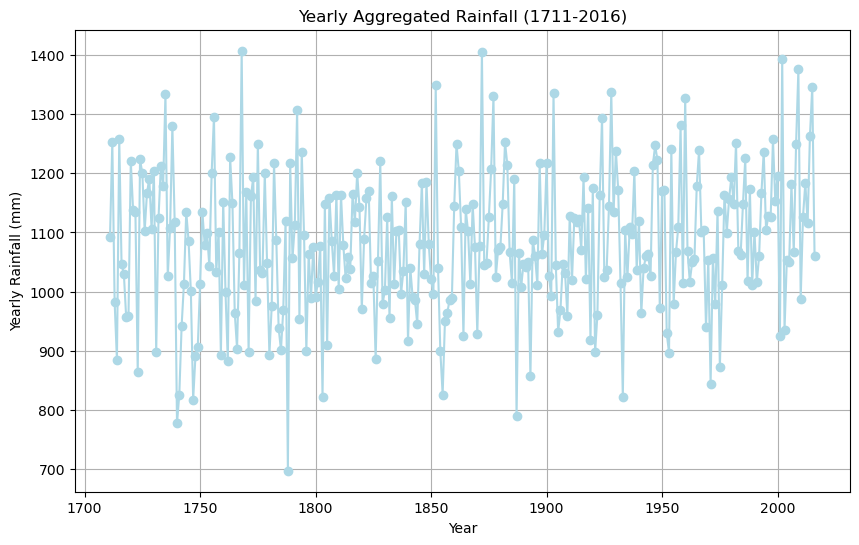

In [14]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Group by year and sum the rainfall for each year
yearly_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].sum()

# Plot the aggregated yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

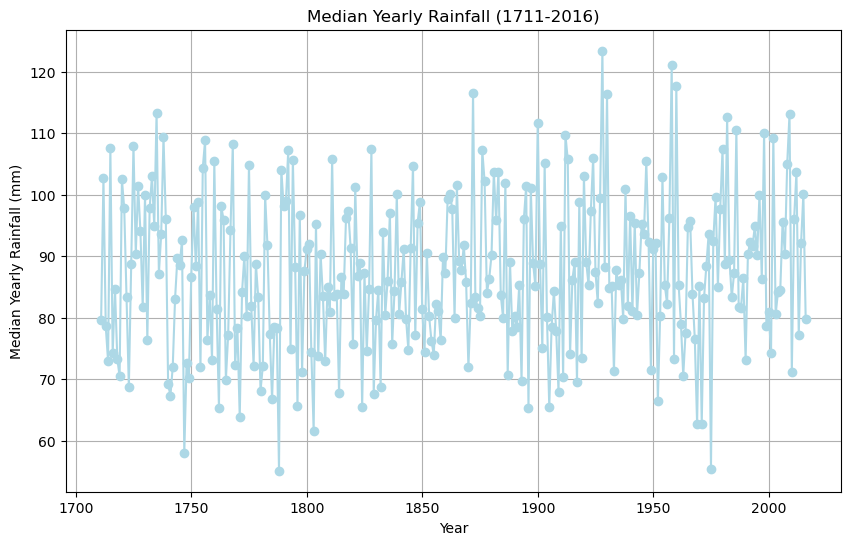

In [15]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()


Creating a yearly rainfall dataset

In [16]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

# write to a new csv file
yearly_rainfall_dataset.to_csv('./data/ireland/generated/yearly_totalrainfall.csv', index=False)

In [17]:
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']

# write to a new csv file
yearly_median_rainfall_dataset.to_csv('./data/ireland/generated/yearly_medianrainfall.csv', index=False)

## Transformation

Before aligning the datasets, they must be transformed to be represented on the same time scale.
To do this, we will need to change the ice/co2 and temp data to only include values between 1711-2016, but on their timescale

For the CO2 data, the latest year is 2001, which reads as -51 from the data format in the file. To compare it with the Irish data, it needs to be reduced down to the same range.

In [18]:
new_co2 = df3.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the 'Gasage (yr BP)' column to actual calendar years
new_co2['Actual Year'] = reference_year - new_co2['Gasage (yr BP) ']

print(new_co2)

      Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)    Actual Year
0          -51.030000  368.022488               0.060442    2001.030000
1          -48.000000  361.780737               0.370000    1998.000000
2          -46.279272  359.647793               0.098000    1996.279272
3          -44.405642  357.106740               0.159923    1994.405642
4          -43.080000  353.946685               0.043007    1993.080000
...               ...         ...                    ...            ...
1896    803925.284376  202.921723               2.064488 -801975.284376
1897    804009.870607  207.498645               0.915083 -802059.870607
1898    804522.674630  204.861938               1.642851 -802572.674630
1899    805132.442334  202.226839               0.689587 -803182.442334
1900    805668.868405  207.285440               2.202808 -803718.868405

[1901 rows x 4 columns]


In [19]:
# Get data from -51 years before present up to the final desired value
end_value = 1711  # Value to end on

# Filter the DataFrame based on the condition where 'Actual Year' reaches or exceeds the specified value
filtered_co2 = new_co2[new_co2['Actual Year'] >= end_value]
print(filtered_co2)

     Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)  Actual Year
0         -51.030000  368.022488               0.060442  2001.030000
1         -48.000000  361.780737               0.370000  1998.000000
2         -46.279272  359.647793               0.098000  1996.279272
3         -44.405642  357.106740               0.159923  1994.405642
4         -43.080000  353.946685               0.043007  1993.080000
..               ...         ...                    ...          ...
178       200.880100  277.600074               0.634933  1749.119900
179       208.742800  276.809000               0.941732  1741.257200
180       216.128000  278.310942               0.941746  1733.872000
181       226.992600  277.013310               0.941734  1723.007400
182       227.135600  278.270110               1.267086  1722.864400

[183 rows x 4 columns]


In [20]:
new_temp = df1.copy()
# calculate the actual calendar year based on the difference from the reference year
reference_year = 1950

# Transform the reference column to actual calendar years
new_temp['Actual Year'] = reference_year - new_temp['EDC3béta']

print(new_temp.head())

   bag  ztop  EDC3béta   AICC2012  deutfinal   temp  acc-EDC3beta  Actual Year
0    1  0.00 -50.00000 -55.000000        NaN  218.3      3.105321   2000.00000
1    2  0.55 -43.55977 -50.513333        NaN  218.3      3.104805   1993.55977
2    3  1.10 -37.44019 -46.026667        NaN  218.3      3.104404   1987.44019
3    4  1.65 -31.64156 -41.540000        NaN  218.3      3.104025   1981.64156
4    5  2.20 -24.55278 -34.516667        NaN  218.3      3.103453   1974.55278


In [21]:
end_value = 1711.00  # Value to end on
filtered_temp = new_temp[new_temp['Actual Year'] >= end_value]

print(filtered_temp)
filtered_temp.to_csv('./data/temp/generated/filtered_temp.csv', index=False)

    bag   ztop    EDC3béta    AICC2012  deutfinal   temp  acc-EDC3beta  \
0     1   0.00  -50.000000  -55.000000        NaN  218.3      3.105321   
1     2   0.55  -43.559770  -50.513333        NaN  218.3      3.104805   
2     3   1.10  -37.440190  -46.026667        NaN  218.3      3.104404   
3     4   1.65  -31.641560  -41.540000        NaN  218.3      3.104025   
4     5   2.20  -24.552780  -34.516667        NaN  218.3      3.103453   
5     6   2.75  -17.784220  -27.493333        NaN  218.3      3.102677   
6     7   3.30  -11.013050  -20.470000        NaN  218.3      3.101557   
7     8   3.85   -3.270300  -12.213333        NaN  218.3      3.099708   
8     9   4.40    5.447842   -3.956667        NaN  218.3      3.096691   
9    10   4.95   13.529990    4.300000        NaN  218.3      3.092812   
10   11   5.50   22.272840   13.220000        NaN  218.3      3.087226   
11   12   6.05   30.709870   22.140000        NaN  218.3      3.080266   
12   13   6.60   38.517570   31.060000

Below there is transformations applied to Ice, CO2 and Temperature so they can be compared on the same time scale.
The limit on the most recent time is the year 2000 from the temperature dataset. The furthest back limit is the year 52986, taken from the Ice Data

In [22]:
filtered_ice = df_ice.copy()

# Set the reference year to 1950 by adjusting the value representing the present (2014) to 1950
filtered_ice['Transformed Year'] = 1950 - ((filtered_ice['age_calkaBP'] * 100) + 2014)

print(filtered_ice.tail())

# Save the transformed ice data to a CSV file
filtered_ice.to_csv('./data/ice/generated/filtered_ice.csv', index=False)


       age_calkaBP  d18Obenth  d18Osw  d18Otemp  sealev  tempanomNH  EuIS-sc  \
52996         -0.4     -0.029  -0.021    -0.008  -0.799      -0.258   -0.590   
52997         -0.3     -0.030  -0.022    -0.008  -0.762      -0.297   -0.591   
52998         -0.2     -0.030  -0.022    -0.008  -0.727      -0.345   -0.591   
52999         -0.1     -0.030  -0.023    -0.007  -0.693      -0.400   -0.591   
53000          0.0     -0.030  -0.023    -0.007  -0.659      -0.465   -0.591   

       NaIS-sc  AIS-sc  GrIS-sc  AnIS-V  AnIS-ID  Transformed Year  
52996   -0.839 -54.333   -6.983    25.1  -2249.7             -24.0  
52997   -0.836 -54.340   -6.942    25.1  -2208.6             -34.0  
52998   -0.834 -54.351   -6.901    25.1  -2208.8             -44.0  
52999   -0.832 -54.360   -6.859    25.1  -2197.4             -54.0  
53000   -0.830 -54.369   -6.818    25.1  -2211.1             -64.0  


In [23]:
temp_for_ice = df1.copy()

end_year = 530000
# Filter the DataFrame based on the condition where 'EDC3béta' reaches or exceeds the specified value
temp_for_ice = temp_for_ice[temp_for_ice['EDC3béta'] <= end_year]
print(temp_for_ice)

       bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5308  5309  2919.40  527152.10000  548281.000000     -435.0  210.6   
5309  5310  2919.95  527728.80000  548806.000000     -436.4  210.4   
5310  5311  2920.50  528319.40000  549331.000000     -437.0  210.3   
5311  5312  2921.05  528915.60000  549804.000000     -435.6  210.5   
5312  5313  2921.60  529498.10000  550277.000000     -429.9  211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3         3.104025  
4         3.103453  
...            ...  
5308      1.

In [24]:
co2_for_ice = df3.copy()

co2_for_ice = co2_for_ice[co2_for_ice['Gasage (yr BP) '] <= end_year]
print(co2_for_ice)

      Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0          -51.030000  368.022488               0.060442
1          -48.000000  361.780737               0.370000
2          -46.279272  359.647793               0.098000
3          -44.405642  357.106740               0.159923
4          -43.080000  353.946685               0.043007
...               ...         ...                    ...
1451    526107.000000  233.700000               0.700000
1452    526895.806061  230.300000               0.800000
1453    527698.690909  227.800000               0.600000
1454    528516.690909  224.700000               1.900000
1455    529403.430303  222.700000               1.000000

[1456 rows x 3 columns]


## Visualising the filtered data

After the above transformations, we can visualise the relationships between them, and also view correlation between the data.

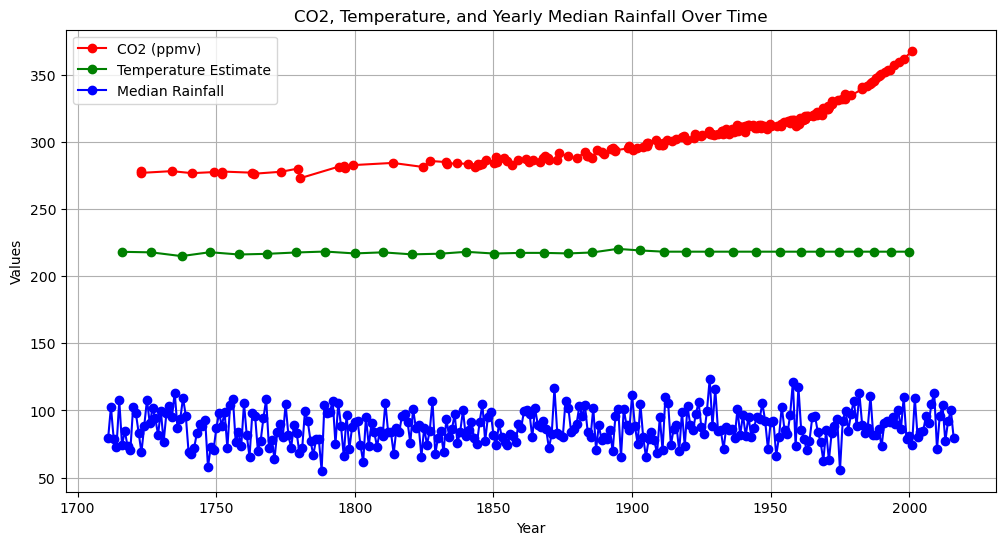

In [25]:
yearco2 = filtered_co2['Actual Year']
yeartemp = filtered_temp['Actual Year']
yearrain = yearly_median_rainfall_dataset['Year']
yeartotalrain = yearly_rainfall_dataset['Year']

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting CO2 data against year
plt.plot(yearco2, filtered_co2['CO2 (ppmv)'], marker='o', linestyle='-', color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
plt.plot(yeartemp, filtered_temp['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')

# Plotting yearly median rainfall against year
plt.plot(yearrain, yearly_median_rainfall_dataset['Median rainfall'], marker='o', linestyle='-', color='blue', label='Median Rainfall')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature, and Yearly Median Rainfall Over Time')

# Display legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()

And also visualise the relationships between ice, co2 and temp data in specific ranges.

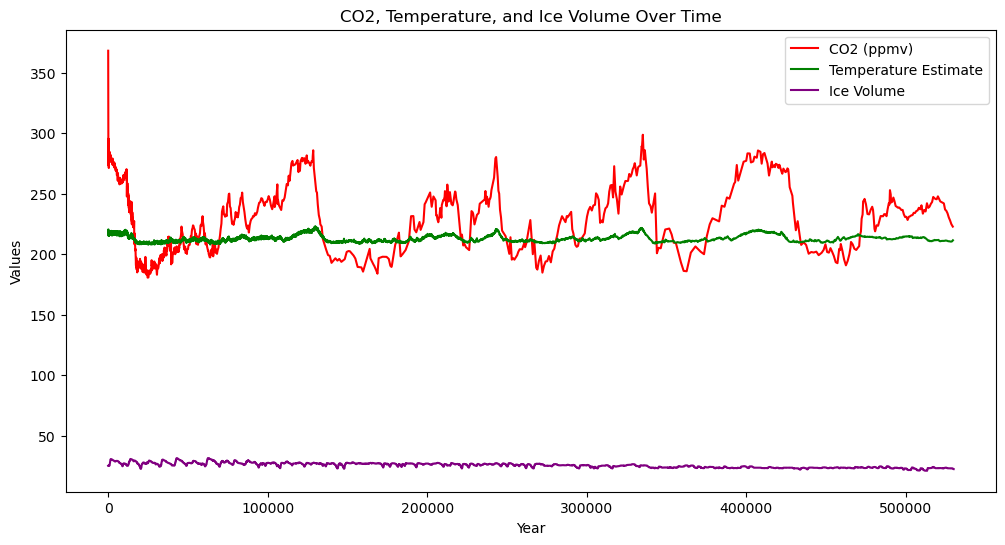

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting CO2 data against year
plt.plot(co2_for_ice['Gasage (yr BP) '], co2_for_ice['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')

# Plotting temperature data against year
plt.plot(temp_for_ice['EDC3béta'], temp_for_ice['temp'], color='green', label='Temperature Estimate')

# Plotting ice volume  against year
plt.plot(filtered_ice['Transformed Year'], filtered_ice['AnIS-V'], color='purple', label='Ice Volume')

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('CO2, Temperature, and Ice Volume Over Time')

ax.legend()
plt.show()

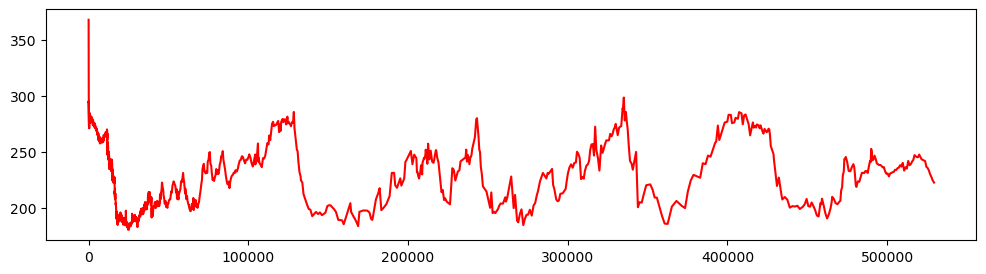

In [27]:
# Plotting CO2 data against year
plt.figure(figsize=(12,3))
plt.plot(co2_for_ice['Gasage (yr BP) '], co2_for_ice['CO2 (ppmv)'], color='red', label='CO2 (ppmv)')

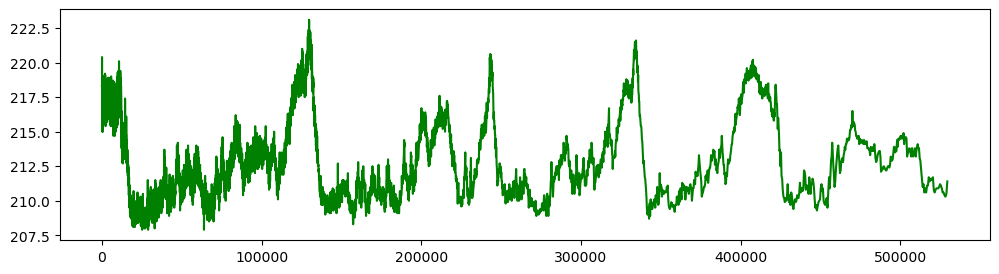

In [28]:
# Plotting temperature data against year
plt.figure(figsize=(12,3))
plt.plot(temp_for_ice['EDC3béta'], temp_for_ice['temp'], color='green', label='Temperature Estimate')

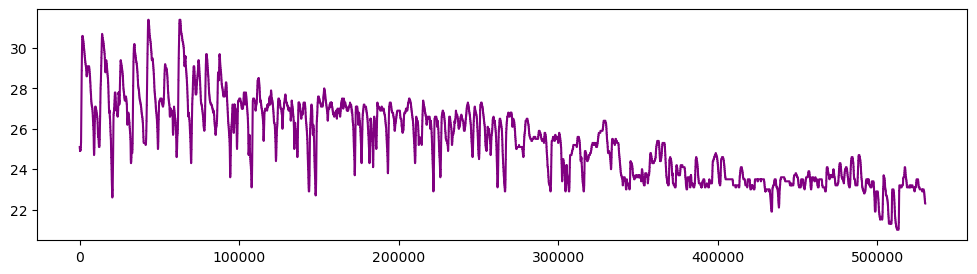

In [29]:
# Plotting ice volume  against year
plt.figure(figsize=(12,3))
plt.plot(filtered_ice['Transformed Year'], filtered_ice['AnIS-V'], color='purple', label='Ice Volume')


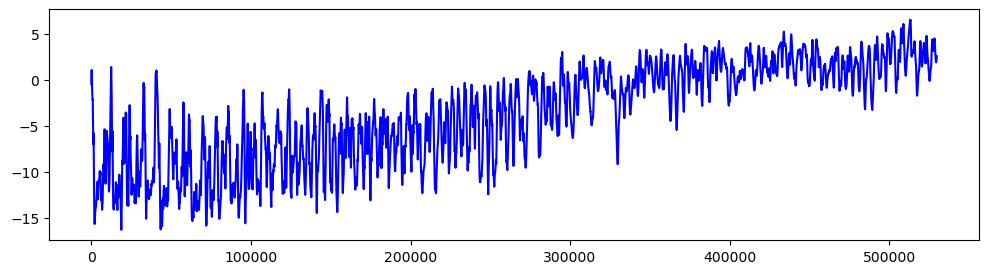

In [30]:
plt.figure(figsize=(12,3))
plt.plot(filtered_ice['Transformed Year'], filtered_ice['tempanomNH'], color='blue', label='Temperature Anomaly')

Now we can attempt to view any possible correlations between the data

In [31]:
# Calculate Pearson correlation coefficients
correlation_coefficients = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_median_rainfall_dataset['Median rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_median_rainfall_dataset['Median rainfall'])
}, index=[0])

# Display correlation coefficients
print(correlation_coefficients)

totalraincorr = pd.DataFrame({
    'Rainfall vs CO2': filtered_co2['CO2 (ppmv)'].corr(yearly_rainfall_dataset['Rainfall']),
    'Rainfall vs Temperature': filtered_temp['temp'].corr(yearly_rainfall_dataset['Rainfall'])
}, index=[0])

print(totalraincorr)

   Rainfall vs CO2  Rainfall vs Temperature
0         0.018008                -0.079192
   Rainfall vs CO2  Rainfall vs Temperature
0         0.038071                -0.003952


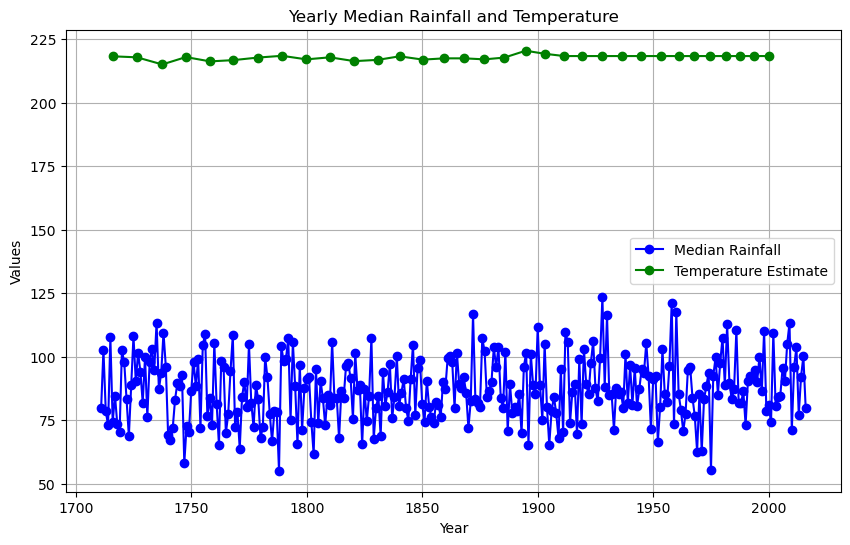

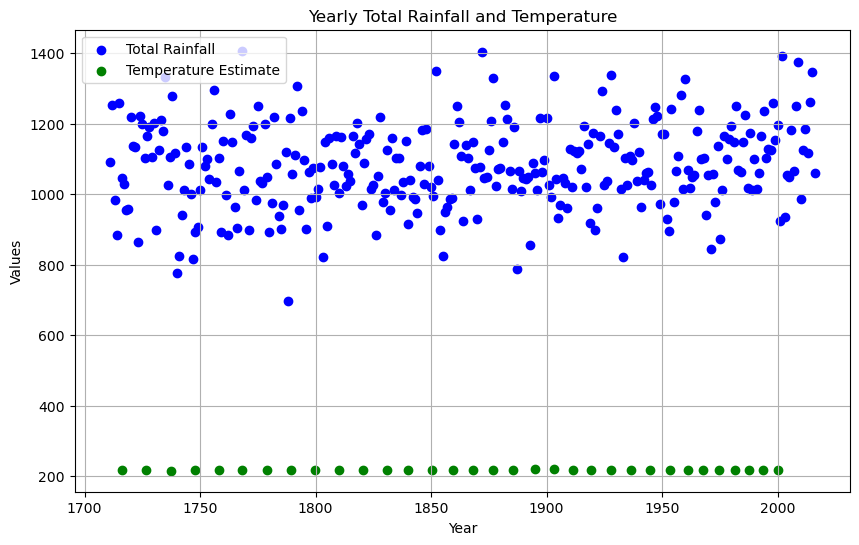

In [32]:
# Line plot: Rainfall and Temperature over years
plt.figure(figsize=(10, 6))
plt.plot(yearrain, yearly_median_rainfall_dataset['Median rainfall'], marker='o', linestyle='-', color='blue', label='Median Rainfall')
plt.plot(yeartemp, filtered_temp['temp'], marker='o', linestyle='-', color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Median Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()

#scatter plot: Rainfall and Temperature over years
plt.figure(figsize=(10, 6))
plt.scatter(yeartotalrain, yearly_rainfall_dataset['Rainfall'], color='blue', label='Total Rainfall')
plt.scatter(yeartemp, filtered_temp['temp'], color='green', label='Temperature Estimate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Total Rainfall and Temperature')
plt.legend()
plt.grid(True)
plt.show()



In [33]:
# Combine the 'Actual Year', 'CO2 (ppmv)', 'temp', and 'Median rainfall' columns into a single DataFrame
combined_data = pd.DataFrame({
    'Year': yearly_rainfall_dataset['Year'],
    'CO2': filtered_co2['CO2 (ppmv)'],
    'Temperature': filtered_temp['temp'],
    'Median Rainfall': yearly_median_rainfall_dataset['Median rainfall'],
    'Rainfall': yearly_rainfall_dataset['Rainfall']
})

combined_data.to_csv('./data/generated/combined_data.csv', index=False)
combined_data.to_json('./data/generated/combined_data.json')

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Year       CO2  Temperature  Median Rainfall  Rainfall
Year             1.000000 -0.959388    -0.519191         0.098249  0.134625
CO2             -0.959388  1.000000     0.495724         0.018008  0.038071
Temperature     -0.519191  0.495724     1.000000        -0.079192 -0.003952
Median Rainfall  0.098249  0.018008    -0.079192         1.000000  0.821663
Rainfall         0.134625  0.038071    -0.003952         0.821663  1.000000


## Aligning the datasets

In [34]:
# # merge datasets
# merged_data = pd.merge(yearly_median_rainfall_dataset, filtered_co2, left_on='Year', right_on='Actual Year')
# merged_data = pd.merge(merged_data, filtered_temp, left_on='Year', right_on='Actual Year')
# merged_data = pd.merge(merged_data, ice_filtered, left_on='Year', right_on='age_calkaBP')

In [35]:
# # handle missing values
# merged_data.dropna(method='ffill', inplace=True)

Aligning the data is essential for visualising the relationship between data that has different dates.

In [36]:
# merged_data.to_csv('./data/generated/merged_data.csv', index=False)

## Reductions/Transformations
before filtering this data. it is important to consider that the data in the other datasets is arranged on a different time scale, using BP and up to 800000 years before that 

---
# **Conclusions**
---

---
# **References**
---

---
# End